#TUGAS BESAR MATA KULIAH MACHINE LEARNING TAHAP II (CLASSIFICATION)

**M Mirza Rizkiawan (1301194330) - IF4307**

**Abdussalam Faqih Hasan (1301190) - IF4307**

#Read Data 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Download data kendaraan_test kemudian tampilkan data tersebut
train_data = !gdown --id 1WEiWPmtvwXDYDofKzJzg75SH22UCqqOb
train_data = pd.read_csv('kendaraan_train.csv')
train_data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
#Download data kendaraan_train kemudian tampilkan data tersebut
test_data = !gdown --id 1qKwfBtdGcpflaaS9DFf5p3VHFXGRSIVw
test_data = pd.read_csv('kendaraan_test.csv')
test_data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


#Data Pre Processing

##Eksplorasi Data

In [ ]:
#informasi jumlah baris dan kolom pada train_data
print('jumlah baris,kolom pada train_data',train_data.shape)

jumlah baris,kolom pada train_data (285831, 12)


In [ ]:
#informasi jumlah baris dan kolom pada test_data (baris,kolom)
print('jumlah baris,kolom pada test_data',test_data.shape)

jumlah baris,kolom pada test_data (47639, 11)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
#informasi setiap kolom pada train_data
train_data.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
#informasi setiap kolom pada test_data
test_data.dtypes

Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

Dari eksplorasi data diatas kita mendapatkan beberapa informasi dari dataset yang kita peroleh. Data kendaraan_train memiliki 285.831 baris dan 12 kolom, sementaran data kendaraan_test memiliki 47.639 baris dan 11 kolom. Dari kedua dataset tersebut terdapat 3 label / kolom yang memiliki tipe data object yaitu Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak, untuk itu perlu dilakukan transformation terhadap ketiga label tersebut untuk mempermudah proses komputasi pada data.

##Data Transformation

In [ ]:
# Data transformation untuk label Umur_Kendaraan,Jenis_Kelamin,Kendaraan_Rusak pada train_data
train_data['Umur_Kendaraan'] = train_data['Umur_Kendaraan'].replace({'< 1 Tahun':0,'1-2 Tahun':1,'> 2 Tahun':2})
train_data['Jenis_Kelamin'] = train_data['Jenis_Kelamin'].replace({'Pria':0,'Wanita':1})
train_data['Kendaraan_Rusak'] = train_data['Kendaraan_Rusak'].replace({'Tidak':0,'Pernah':1})

In [ ]:
# Data transformation untuk label Umur_Kendaraan,Jenis_Kelamin,Kendaraan_Rusak pada test_data
test_data['Umur_Kendaraan'] = test_data['Umur_Kendaraan'].replace({'< 1 Tahun':0,'1-2 Tahun':1,'> 2 Tahun':2})
test_data['Jenis_Kelamin'] = test_data['Jenis_Kelamin'].replace({'Pria':0,'Wanita':1})
test_data['Kendaraan_Rusak'] = test_data['Kendaraan_Rusak'].replace({'Tidak':0,'Pernah':1})

In [ ]:
train_data.dtypes

id                     int64
Jenis_Kelamin        float64
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan       float64
Kendaraan_Rusak      float64
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
test_data.dtypes

Jenis_Kelamin        int64
Umur                 int64
SIM                  int64
Kode_Daerah          int64
Sudah_Asuransi       int64
Umur_Kendaraan       int64
Kendaraan_Rusak      int64
Premi                int64
Kanal_Penjualan      int64
Lama_Berlangganan    int64
Tertarik             int64
dtype: object

Setelah proses data transformation maka seluruh label pada dataset akan memilikii tipe int64 sehingga akan mempermudah proses komputasi pada data.

##Data Cleaning

In [ ]:
#Jumlah nilai null pada kendaraan_train.csv
train_data.isnull().sum().sort_values(ascending=True)

id                       0
Tertarik                 0
Lama_Berlangganan    13992
Kendaraan_Rusak      14188
Umur                 14214
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kanal_Penjualan      14299
Kode_Daerah          14306
SIM                  14404
Jenis_Kelamin        14440
Premi                14569
dtype: int64

In [ ]:
#Jumlah nilai null pada kendaraan_test.csv
test_data.isnull().sum().sort_values(ascending=True)

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

###Skewness value
Dalam statistka skewness (kemencengan) adalah ukuran ketidaksimetrisan dalam distribusi nilai. Nilai skewness yang normal (dapat diterima) adalah antara -2 sampai +2. Yang akan kita lakukan adalah mengubah missing value pada label yang memiliki skewness normal menjadi nilai mean nya sementara label yang memiliki skewness tidak normal missing value nya akan diubah menjadi nilai median nya

In [ ]:
# cek nilai skewness
train_data.skew(axis = 0, skipna = True)

id                    0.000000
Jenis_Kelamin         0.162403
Umur                  0.671077
SIM                 -21.489056
Kode_Daerah          -0.116322
Sudah_Asuransi        0.165452
Umur_Kendaraan        0.252693
Kendaraan_Rusak      -0.019166
Premi                 1.656493
Kanal_Penjualan      -0.899909
Lama_Berlangganan     0.003858
Tertarik              2.303219
dtype: float64

###Missing value handling

In [ ]:
# Label yang memiliki skewness tidak normal hanya label SIM sementara label lain nya normal
# maka missing value pada label SIM akan diganti dengan nilai median
# Sementara missing value pada label lainnya akan diganti dengan nilai mean

train_data['SIM'].fillna(train_data['SIM'].median(),inplace=True)

train_data['Jenis_Kelamin'].fillna(train_data['Jenis_Kelamin'].mean(),inplace=True)
train_data['Umur'].fillna(train_data['Umur'].mean(),inplace=True)
train_data['Kode_Daerah'].fillna(train_data['Kode_Daerah'].mean(),inplace=True)
train_data['Sudah_Asuransi'].fillna(train_data['Sudah_Asuransi'].mean(),inplace=True)
train_data['Umur_Kendaraan'].fillna(train_data['Umur_Kendaraan'].mean(),inplace=True)
train_data['Kendaraan_Rusak'].fillna(train_data['Kendaraan_Rusak'].mean(),inplace=True)
train_data['Premi'].fillna(train_data['Premi'].mean(),inplace=True)
train_data['Kanal_Penjualan'].fillna(train_data['Kanal_Penjualan'].mean(),inplace=True)
train_data['Lama_Berlangganan'].fillna(train_data['Lama_Berlangganan'].mean(),inplace=True)

In [ ]:
# Cek lagi missing value pada train_data
train_data.isnull().sum().sort_values(ascending=True)

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

###Duplicate Data

In [ ]:
print('jumlah data duplikat pada data kendaraan_train: ',train_data.duplicated().sum())
print('jumlah data duplikat pada data kendaraan_test: ',test_data.duplicated().sum())

jumlah data duplikat pada data kendaraan_train:  0
jumlah data duplikat pada data kendaraan_test:  3


In [ ]:
#Karena data duplikat tidak mempengaruhi proses klasifikasi maka bisa di drop
test_data.drop_duplicates(keep=False,inplace=True)
print('jumlah data duplikat pada data kendaraan_train: ',train_data.duplicated().sum())
print('jumlah data duplikat pada data kendaraan_test: ',test_data.duplicated().sum())

jumlah data duplikat pada data kendaraan_train:  0
jumlah data duplikat pada data kendaraan_test:  0


##Outliers handling

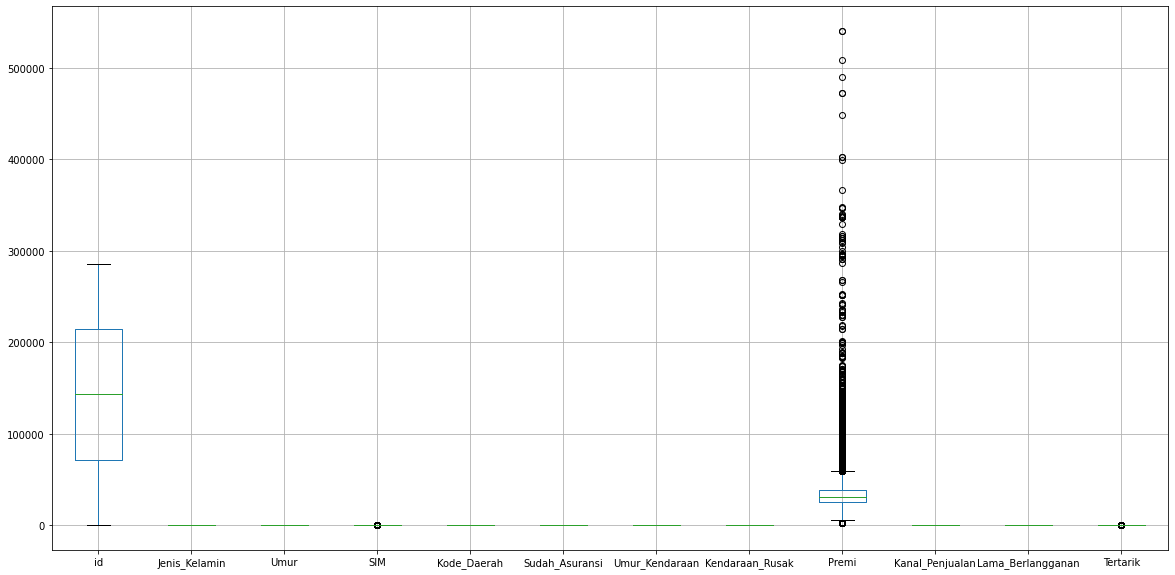

In [ ]:
# Menampilkan boxplot untuk visualisasi outlier
train_data.boxplot(figsize=[20,10])

In [ ]:
# Mencari nilai outlier menggunakan nilai IQR
Q1 = np.percentile(train_data['Premi'], 25, interpolation = 'midpoint')
Q2 = np.percentile(train_data['Premi'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(train_data['Premi'], 75, interpolation = 'midpoint')

# Menghitung nilai IQR
IQR = Q3 - Q1
print('Interquartile range is', IQR)

# Menghitung nilai lower bound dan upper bound
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

# Menampilkan seluruh nilai outlier
outlier =[]
for x in train_data['Premi']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 13916.0
low_limit is 4055.0
up_limit is 59719.0
 outlier in the dataset is [2630.0, 88883.0, 2630.0, 2630.0, 2630.0, 2630.0, 82935.0, 2630.0, 2630.0, 2630.0, 2630.0, 103372.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 60512.0, 69212.0, 2630.0, 2630.0, 2630.0, 2630.0, 62818.0, 61911.0, 2630.0, 63672.0, 2630.0, 2630.0, 2630.0, 61161.0, 2630.0, 60630.0, 2630.0, 2630.0, 2630.0, 60181.0, 72734.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 76693.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 75631.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 62438.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 2630.0, 62684

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


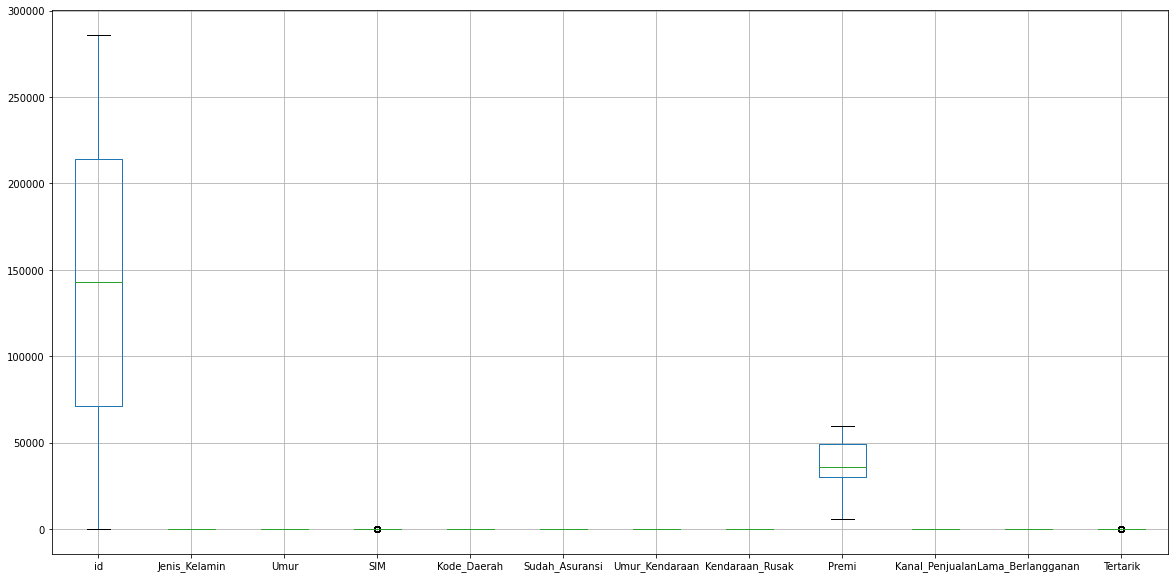

In [ ]:
# Handling outlier pada label premi dan visualisasi setelah handling
for i in range(len(train_data)):
  if train_data['Premi'].iloc[i] > up_lim:
    train_data['Premi'].iloc[i] = up_lim
  if train_data['Premi'].iloc[i] < low_lim:
    train_data['Premi'].iloc[i] = up_lim
train_data.boxplot(figsize=[20,10])

##Correlation

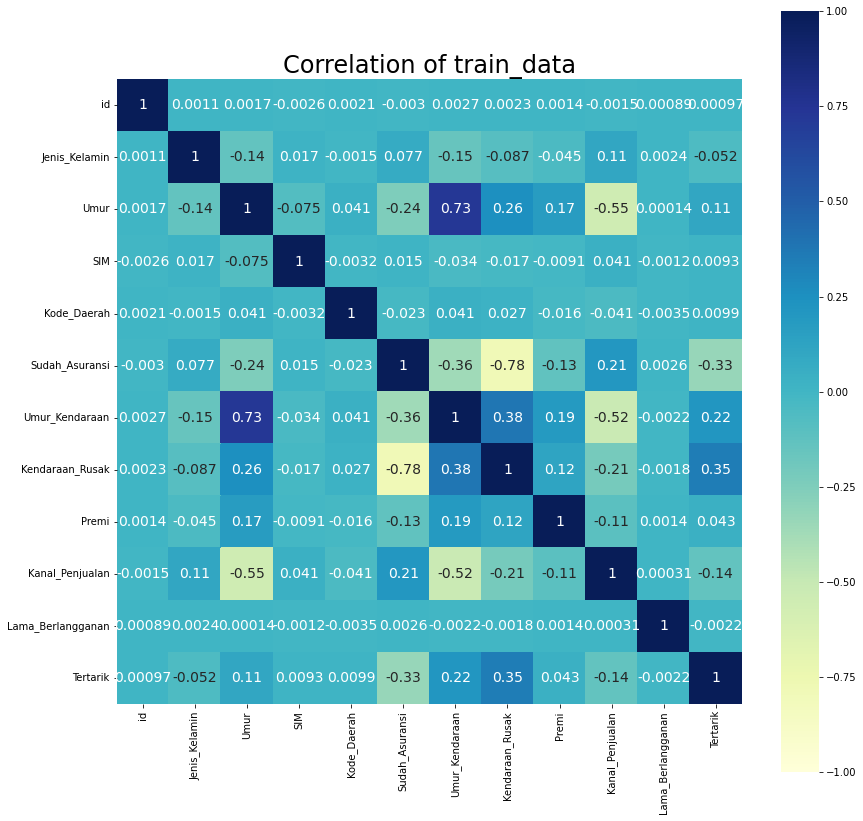

In [ ]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(train_data.corr(),
            annot=True, ax=ax, square=True, cmap="YlGnBu", vmin=-1, vmax=1, annot_kws={'size':14})
plt.title('Correlation of train_data',size=24)
plt.show()

##Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

train_data = train_data.drop('id', 1)
x = train_data.drop('Tertarik',1)
y = train_data['Tertarik']

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=42)

x_test = test_data.drop('Tertarik',1)
y_test = test_data['Tertarik']

In [ ]:
print('ukuran x_train:', x_train.shape,'ukuran y_train:',y_train.shape)
print('ukuran x_val:', x_val.shape,'ukuran y_val:',y_val.shape)
print('ukuran x_test:', x_test.shape,'ukuran y_test:',y_test.shape)

ukuran x_train: (228664, 10) ukuran y_train: (228664,)
ukuran x_val: (57167, 10) ukuran y_val: (57167,)
ukuran x_test: (47633, 10) ukuran y_test: (47633,)


#Classification Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
list_acc = []

##KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train,y_train)
y_pred_KNN = model_KNN.predict(x_val)

list_acc.append(accuracy_score(y_val,y_pred_KNN))
print('Test Accuracy :',accuracy_score(y_val,y_pred_KNN))

Test Accuracy : 0.8608113072226984


Text(0.5, 1.0, 'Confusion Matrix for KNN Model')

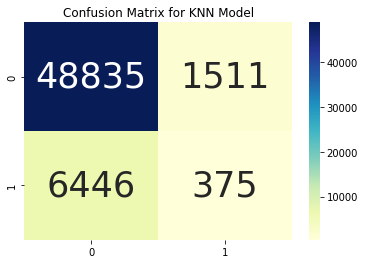

In [ ]:
matrix = confusion_matrix(y_val,y_pred_KNN)
sns.heatmap(data=matrix,cmap='YlGnBu',annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix for KNN Model')

In [ ]:
print('Classification report: ')
print(classification_report(y_val,y_pred_KNN))

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     50346
           1       0.20      0.05      0.09      6821

    accuracy                           0.86     57167
   macro avg       0.54      0.51      0.51     57167
weighted avg       0.80      0.86      0.82     57167



## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_ID3 = DecisionTreeClassifier()
model_ID3.fit(x_train,y_train)
y_pred_ID3 = model_ID3.predict(x_val)

list_acc.append(accuracy_score(y_val,y_pred_ID3))
print('Test Accuracy :',accuracy_score(y_val,y_pred_ID3))

Test Accuracy : 0.8244441723371876


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

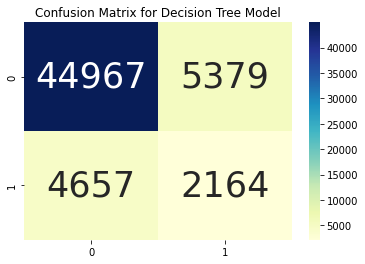

In [ ]:
matrix = confusion_matrix(y_val,y_pred_ID3)
sns.heatmap(data=matrix,cmap='YlGnBu',annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix for Decision Tree Model')

In [ ]:
print('Classification report: ')
print(classification_report(y_val,y_pred_ID3))

Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     50346
           1       0.29      0.32      0.30      6821

    accuracy                           0.82     57167
   macro avg       0.60      0.61      0.60     57167
weighted avg       0.83      0.82      0.83     57167



##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(x_train,y_train)
y_pred_RF = model_RF.predict(x_val)

list_acc.append(accuracy_score(y_val,y_pred_RF))
print('Test Accuracy :',accuracy_score(y_val,y_pred_RF))

Test Accuracy : 0.8700124197526545


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

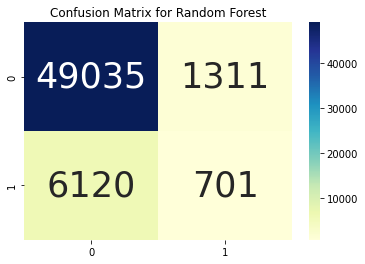

In [ ]:
matrix = confusion_matrix(y_val,y_pred_RF)
sns.heatmap(data=matrix,cmap='YlGnBu',annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix for Random Forest')

In [ ]:
print('Classification report: ')
print(classification_report(y_val,y_pred_RF))

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     50346
           1       0.35      0.10      0.16      6821

    accuracy                           0.87     57167
   macro avg       0.62      0.54      0.54     57167
weighted avg       0.82      0.87      0.84     57167



In [ ]:
model_list = ['KNN','ID3','RF']
df_acc = pd.DataFrame(model_list,columns=['model'])
df_acc['accuracy'] = list_acc

Text(0.5, 1.0, 'Perbandingan akurasi model')

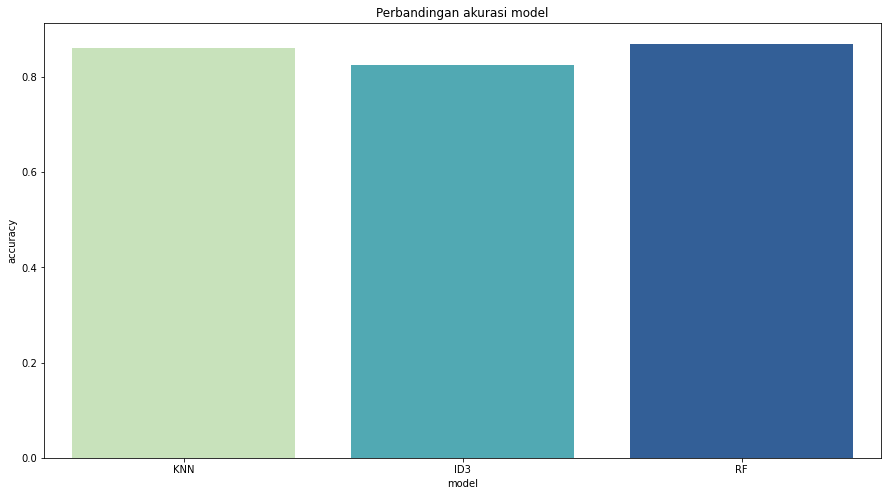

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='model',y='accuracy',palette='YlGnBu',data=df_acc).set_title("Perbandingan akurasi model")

#Model selection and evaluation

In [ ]:
from sklearn.model_selection import cross_validate

cross_val = cross_validate(model_RF, x_train, y_train, cv=5)
print(cross_val['test_score'])
print(cross_val['test_score'].mean())

[0.86860691 0.86707629 0.86725122 0.8679728  0.86670165]
0.8675217750930535


In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train,y_train)
y_pred_RF = model_RF.predict(x_test)

print('Test Accuracy :',accuracy_score(y_test,y_pred_RF))

Test Accuracy : 0.86395985976109


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

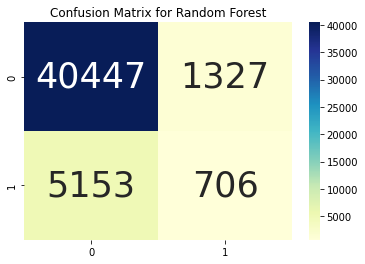

In [ ]:
matrix = confusion_matrix(y_test,y_pred_RF)
sns.heatmap(data=matrix,cmap='YlGnBu',annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix for Random Forest')

In [ ]:
print('Classification report: ')
print(classification_report(y_test,y_pred_RF))

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     41774
           1       0.35      0.12      0.18      5859

    accuracy                           0.86     47633
   macro avg       0.62      0.54      0.55     47633
weighted avg       0.82      0.86      0.83     47633

